<a href="https://colab.research.google.com/github/OlyaSto/Olyabmstu/blob/master/%D0%A2%D0%9C%D0%9E/%D0%9D%D0%98%D0%A0%D0%A1/NIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Научно-исследовательская работа на тему "Прогнозирование цен на разные модели марки машин Ford"

В качестве датасета будем использовать набор данных, содержащий данные о характеристиках и ценах на различные модели машин Ford.
https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

Датасет содержит следующие атрибуты:
1. model - > Ford Car Brands - Модели машин марки Ford
2. year - >Production Year - Год выпуска
3. price - >Price of car in $ - Цена машины в долларах
4. transmission - > Automatic,Manual, Semi-Auto - Тип коробки передач: автоматическая, ручная, полуавтоматическая
5. mileage -> Number of miles traveled - Количество пройденных миль
6. fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other - Тип топлива: бензин, дизель, гибрид, электричество, другое
7. tax -> Annual Tax - Ежегодный налог
8. mpg - > Miles per Gallon - Милли на галон
9. engineSize - > Car's Engine Size - Размер двигателя автомобиля

Будем решать задачу регрессии: в качестве целевого признака будем использовать price.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

Монтирование Google Drive для получения доступа к данным, лежащим на нем:

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
filename = '/content/drive/MyDrive/ford.csv'

In [39]:
train = pd.read_csv(filename, sep=',')

In [40]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасето

In [31]:
# Первые 5 строк датасета
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [32]:
# Размер датасета - 395 строк, 33 колонки
train.shape

(17812, 9)

In [33]:
# Список колонок
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [34]:
# Список колонок с типами данных 
train.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [35]:
# Проверим наличие пустых значений
train.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

В данном наборе данных нет пропусков.

## Построение графиков для понимания структуры данных

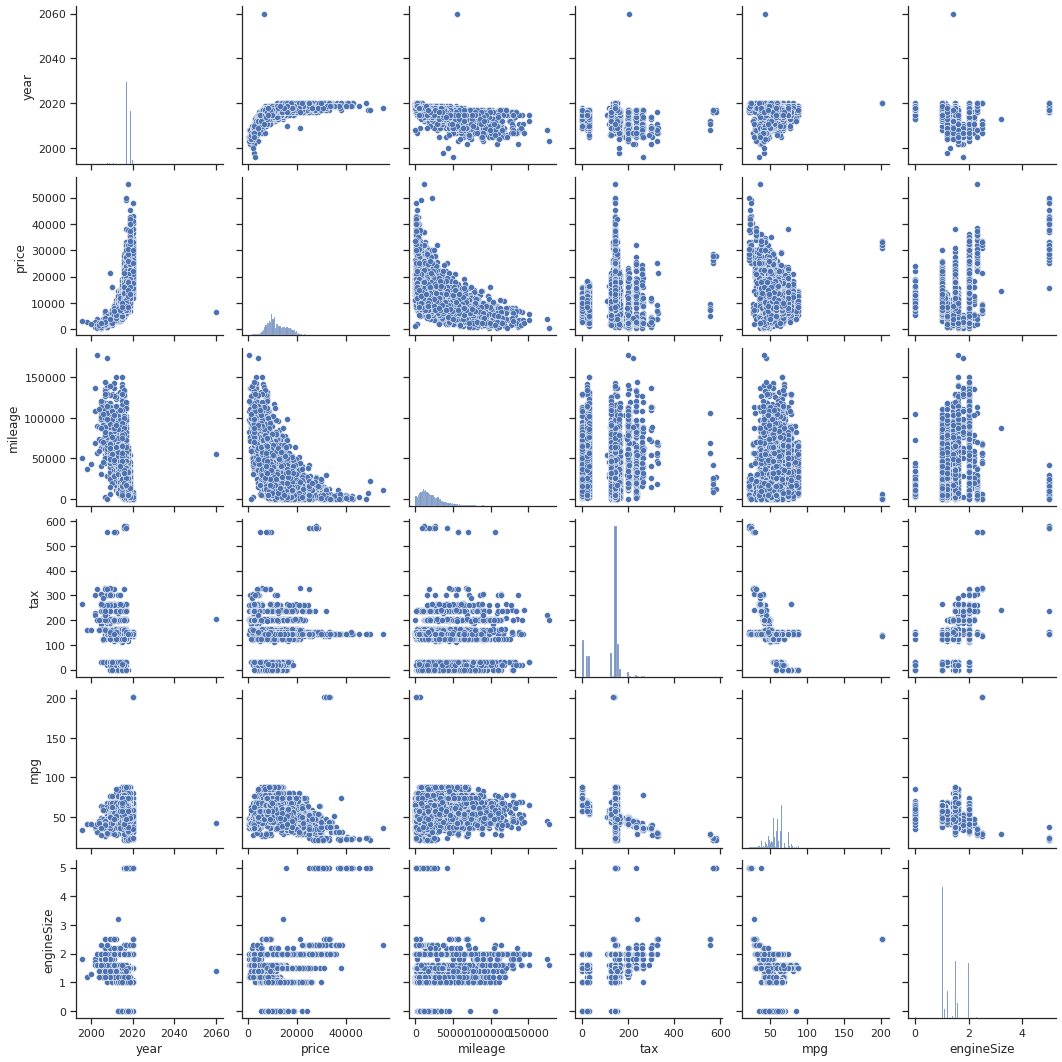

In [36]:
# Парные диаграммы
sns.pairplot(train)

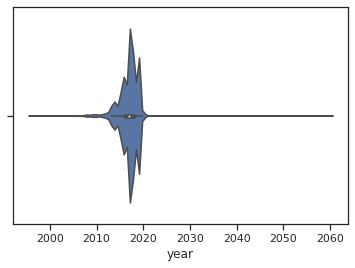

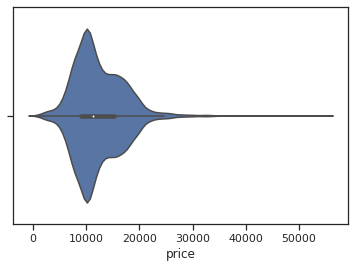

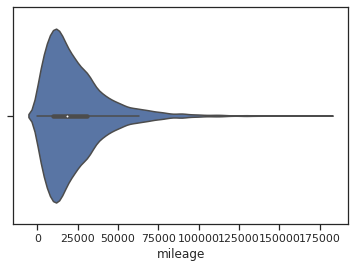

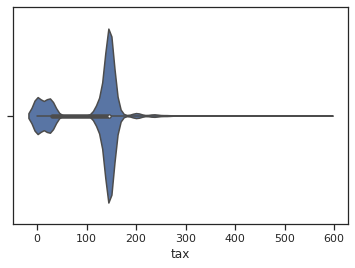

In [13]:
# Скрипичные диаграммы для числовых колонок
for col in ['year', 'price', 'mileage', 'tax']:
    sns.violinplot(x=train[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [37]:
train.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

Для построения модели будем использовать все признаки.

### Кодирование категориальных данных

Категориальные данные находятся в столбцах "model", "fuelType", "transmission". Для кодирования этих столбцов будем использовать LabelEncoder:

In [21]:
from sklearn.preprocessing import LabelEncoder

In [50]:
#model
lemanum = LabelEncoder()
lemanumarr = lemanum.fit_transform(train["model"])
train["model"] = lemanumarr
train = train.astype({"model":"int"})

#transmission
lemot = LabelEncoder()
lemotarr = lemot.fit_transform(train["transmission"])
train["transmission"] = lemotarr
train = train.astype({"transmission":"int"})

#fuelType
lemof = LabelEncoder()
lemofarr = lemof.fit_transform(train["fuelType"])
train["fuelType"] = lemofarr
train = train.astype({"fuelType":"int"})

Выведем новые уникальные значения

In [51]:
np.unique(lemanumarr), np.unique(lemotarr), np.unique(lemofarr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), array([0, 1, 2]), array([0, 1, 2, 3, 4]))

Выведем обновленную таблицу

In [52]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0


In [53]:
train.dtypes

model             int64
year              int64
price             int64
transmission      int64
mileage           int64
fuelType          int64
tax               int64
mpg             float64
engineSize      float64
dtype: object

## Масштабирование данных

In [60]:
# Числовые колонки для масштабирования
scale_cols = ['year', 'mileage', 'tax', 'model', 'transmission', 'fuelType', 'mpg',
              'engineSize']

In [61]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(train[scale_cols])

In [62]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    train[new_col_name] = sc1_data[:,i]


In [63]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,year_scaled,price_scaled,mileage_scaled,tax_scaled,model_scaled,transmission_scaled,fuelType_scaled,mpg_scaled,engineSize_scaled
0,5,2017,12000,0,15944,4,150,57.7,1.0,0.328125,0.211101,0.089747,0.258621,0.217391,0.0,1.0,0.203867,0.2
1,6,2018,14000,1,9083,4,150,57.7,1.0,0.343750,0.247798,0.051125,0.258621,0.260870,0.5,1.0,0.203867,0.2
2,6,2017,13000,1,12456,4,150,57.7,1.0,0.328125,0.229450,0.070113,0.258621,0.260870,0.5,1.0,0.203867,0.2
3,5,2019,17500,1,10460,4,145,40.3,1.5,0.359375,0.312018,0.058877,0.250000,0.217391,0.5,1.0,0.107735,0.3
4,5,2019,16500,0,1482,4,145,48.7,1.0,0.359375,0.293670,0.008337,0.250000,0.217391,0.0,1.0,0.154144,0.2


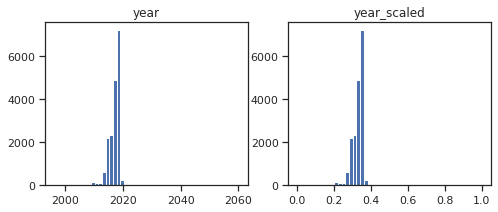

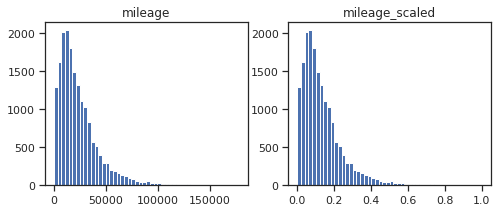

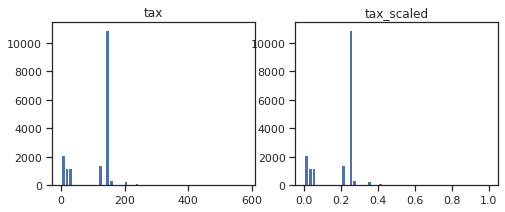

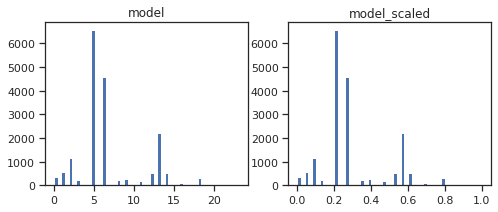

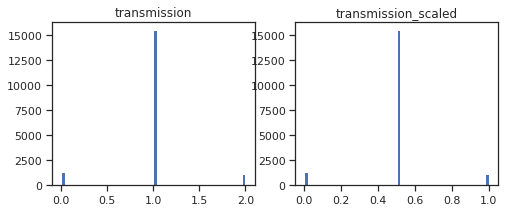

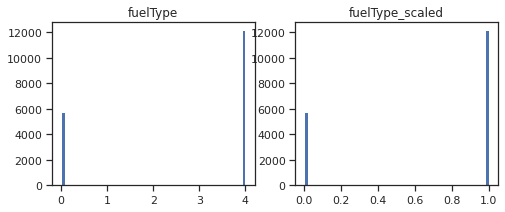

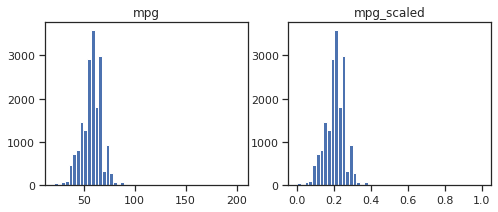

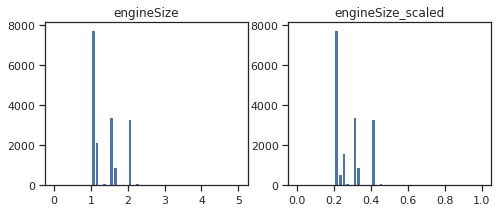

In [64]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(train[col], 50)
    ax[1].hist(train[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [65]:
corr_cols_1 = scale_cols + ['price']
corr_cols_1

['year',
 'mileage',
 'tax',
 'model',
 'transmission',
 'fuelType',
 'mpg',
 'engineSize',
 'price']

In [67]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['price']
corr_cols_2

['year_scaled',
 'mileage_scaled',
 'tax_scaled',
 'model_scaled',
 'transmission_scaled',
 'fuelType_scaled',
 'mpg_scaled',
 'engineSize_scaled',
 'price']

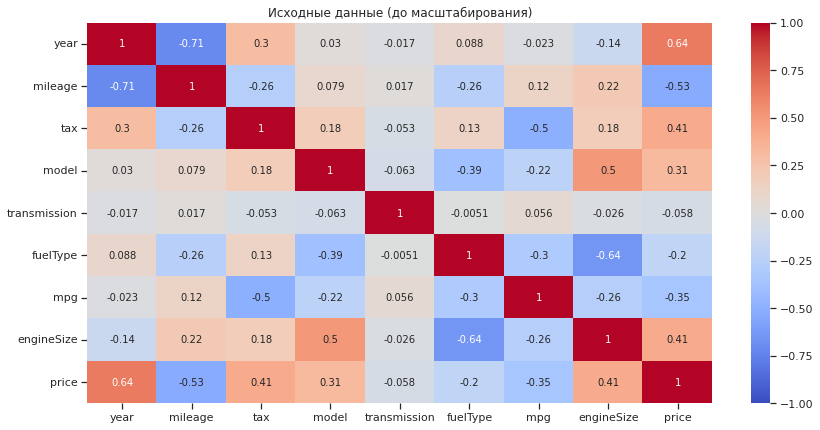

In [68]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_1].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

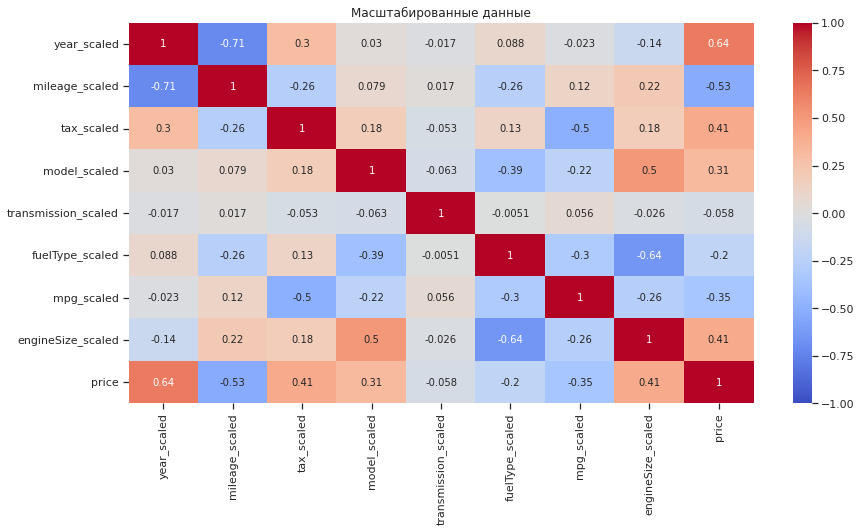

In [69]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_2].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Масштабированные данные')
plt.show()

In [70]:
print('Признаки, имеющие максимальную по модулю корреляцию с целевым признаком')
best_params = train[corr_cols_1].corr()['price'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.15]
best_params

Признаки, имеющие максимальную по модулю корреляцию с целевым признаком


year          0.636009
mileage       0.530659
engineSize    0.411178
tax           0.406857
mpg           0.346419
model         0.314736
fuelType      0.202855
Name: price, dtype: float64

На основе корреляционной матрицы можно сделать следующие выводы:

1. Корреляционные матрицы для исходных и масштабированных данных совпадают.
2. Целевой признак регрессии price наиболее сильно коррелирует с годом выпуска машины (0.64) и c колличеством пройденых миль (0.53). Эти признаки обязательно следует оставить в модели классификации.

## Выбор метрик для последующей оценки качества моделей.

### В качестве метрик для решения задачи регрессии будем использовать:

### Mean absolute error - средняя абсолютная ошибка

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции mean_absolute_error.

### Mean squared error - средняя квадратичная ошибка
 


Вычисляется с помощью функции mean_squared_error.

### Метрика R^2 или коэффициент детерминации

Вычисляется с помощью функции r2_score.

## Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [72]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи регрессии.

Для задачи регрессии будем использовать следующие модели:

*   Линейная регрессия
*   Метод ближайших соседей
*   Решающее дерево
*   Случайный лес
*   Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [73]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,year_scaled,price_scaled,mileage_scaled,tax_scaled,model_scaled,transmission_scaled,fuelType_scaled,mpg_scaled,engineSize_scaled
0,5,2017,12000,0,15944,4,150,57.7,1.0,0.328125,0.211101,0.089747,0.258621,0.217391,0.0,1.0,0.203867,0.2
1,6,2018,14000,1,9083,4,150,57.7,1.0,0.343750,0.247798,0.051125,0.258621,0.260870,0.5,1.0,0.203867,0.2
2,6,2017,13000,1,12456,4,150,57.7,1.0,0.328125,0.229450,0.070113,0.258621,0.260870,0.5,1.0,0.203867,0.2
3,5,2019,17500,1,10460,4,145,40.3,1.5,0.359375,0.312018,0.058877,0.250000,0.217391,0.5,1.0,0.107735,0.3
4,5,2019,16500,0,1482,4,145,48.7,1.0,0.359375,0.293670,0.008337,0.250000,0.217391,0.0,1.0,0.154144,0.2


In [74]:
# Признаки для задачи регрессии
task_regr_cols = ['year_scaled', 'mileage_scaled', 'engineSize', 'mpg_scaled']

In [76]:
# Выборки для задачи регресии
y = train['price']
X = train[task_regr_cols]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [77]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12576, 4), (5390, 4), (12576,), (5390,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи регрессии

In [123]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [124]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [125]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [126]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=1743.294, MSE=5669341.277, R2=0.732
KNN_5 	 MAE=1051.973, MSE=2427528.982, R2=0.885
SVR 	 MAE=3399.929, MSE=20036371.304, R2=0.053
Tree 	 MAE=1218.746, MSE=3333097.426, R2=0.843
RF 	 MAE=1023.047, MSE=2279963.966, R2=0.892
GB 	 MAE=1109.199, MSE=2519748.727, R2=0.881


## Подбор гиперпараметров для выбранных моделей.

### Линейная регрессия

In [82]:
x_train.shape

(12576, 4)

In [83]:
print(LinearRegression().get_params().keys())

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])


In [84]:
%%time
grid={'n_jobs':np.logspace(-3,3,3)}
regr_gs_LR = GridSearchCV(LinearRegression(), grid, cv=5, scoring='neg_mean_squared_error')
regr_gs_LR.fit(x_train, y_train)

CPU times: user 149 ms, sys: 82.8 ms, total: 232 ms
Wall time: 209 ms


In [85]:
regr_gs_LR.best_estimator_

LinearRegression(n_jobs=0.001)

In [86]:
regr_gs_LR.best_params_

{'n_jobs': 0.001}

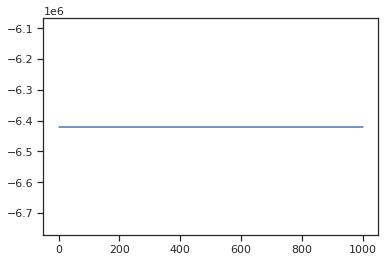

In [87]:
plt.plot(np.logspace(-3,3,3), regr_gs_LR.cv_results_['mean_test_score'])

### Метод ближайших соседей

In [88]:
print(KNeighborsRegressor().get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [89]:
n_range = np.array(range(1,220,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
         170, 171, 172,

In [90]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(x_train, y_train)

CPU times: user 2min 14s, sys: 334 ms, total: 2min 14s
Wall time: 2min 14s


In [91]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=7)

In [92]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 7}

In [93]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'7'

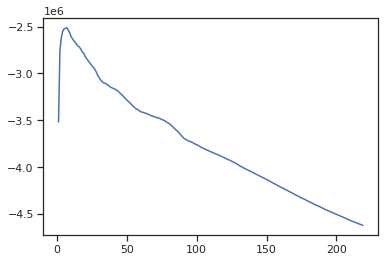

In [94]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

### Решающее дерево

In [98]:
print(DecisionTreeRegressor().get_params().keys())

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])


In [99]:
params = {"max_depth":range(1,20), "max_features":range(1,5)}

Tree_gs = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring='neg_mean_squared_error')
Tree_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20),
                         'max_features': range(1, 5)},
             scoring='neg_mean_squared_error')

In [100]:
# Лучшая модель
Tree_gs.best_estimator_

DecisionTreeRegressor(max_depth=11, max_features=3)

In [ ]:
# Лучшее значение параметров
Tree_gs.best_params_

### Градиентный бустинг

In [101]:
print(GradientBoostingRegressor().get_params().keys())

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [102]:
GB_params={"max_features":range(1,5), "max_leaf_nodes":range(2,22)}
GB_gs = GridSearchCV(GradientBoostingRegressor(), GB_params, cv=5, scoring='neg_mean_squared_error')
GB_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_features': range(1, 5),
                         'max_leaf_nodes': range(2, 22)},
             scoring='neg_mean_squared_error')

In [103]:
# Лучшее значение параметров
GB_gs.best_params_

{'max_features': 3, 'max_leaf_nodes': 19}

### Случайный лес

In [104]:
print(RandomForestRegressor().get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [105]:
RF_params={"max_leaf_nodes":range(2,12), "max_samples":range(2,22)}
RF_gs = GridSearchCV(RandomForestRegressor(), RF_params, cv=5, scoring='neg_mean_squared_error')
RF_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_leaf_nodes': range(2, 12),
                         'max_samples': range(2, 22)},
             scoring='neg_mean_squared_error')

In [106]:
# Лучшая модель
RF_gs.best_estimator_

RandomForestRegressor(max_leaf_nodes=9, max_samples=21)

## Сравнение качества полученных моделей с качеством baseline-моделей.

In [107]:
models_grid = { 'LinR_new':regr_gs_LR.best_estimator_,
               'KNN_new':regr_gs.best_estimator_,
              'Tree_new':Tree_gs.best_estimator_,
               'RF_new':RF_gs.best_estimator_,
              'GB_new':GB_gs.best_estimator_
              }

In [127]:
for model_name, model in models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

LinR_new 	 MAE=1743.294, MSE=5669341.277, R2=0.732
KNN_new 	 MAE=1045.929, MSE=2373687.943, R2=0.888
Tree_new 	 MAE=1016.235, MSE=2440876.267, R2=0.885
RF_new 	 MAE=1855.286, MSE=6639916.724, R2=0.686
GB_new 	 MAE=1108.471, MSE=2507695.259, R2=0.882


## Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [128]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

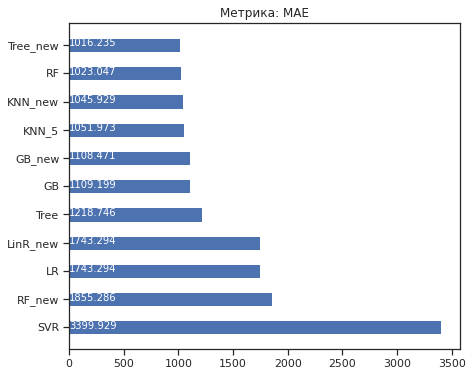

In [129]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

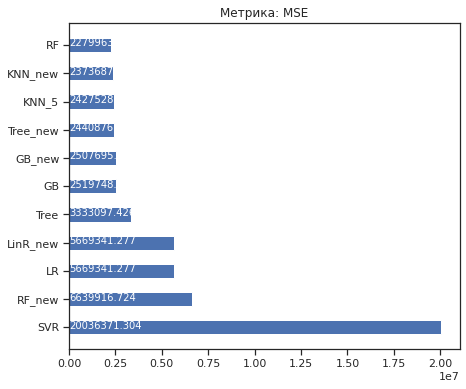

In [130]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

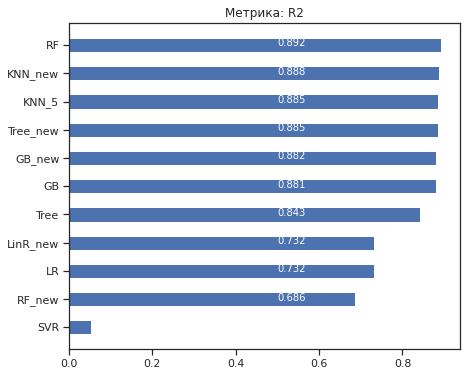

In [131]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

Вывод: лучшими оказались модели на основе близжайших соседей и случаного леса. При отдельных запусках вместо градиентного бустинга оказывается лучшей модель опорных векторов.